In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import seaborn as sns
from statsmodels import api as sm
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
import os
import numpy as np
import validate
from sklearn.preprocessing import StandardScaler

In [16]:
def make_data(lst, dim):
    lst=pd.DataFrame(lst)
    lst.columns=['data']
    window=dim
    str='data'
    for i in range(1, window):
        column=f'{str}_lag{i}'
        lst[column]=lst[str].shift(i)
    lst=lst.dropna().reset_index(drop=True)
    return lst.values

In [17]:
df = pd.read_csv( os.path.join('csv_label', 'learning_data_10.csv') )
df=df[df['day']<=9]
df

,original,label,time,day
0,53.4,0,15,0
1,52.8,0,15,0
2,52.8,0,15,0
3,53.2,0,15,0
4,53.6,0,15,0
...,...,...,...,...
3995345,45.9,0,5,9
3995346,45.6,0,5,9
3995347,45.8,0,5,9
3995348,45.7,0,5,9


In [24]:
test_day=[5]
data = df.loc[df['day'].isin(test_day), 'original'].reset_index(drop=True)

w = 25
l = 25
d = 10
m = 2
T = len(data)
abnorm = [0 for i in range(0, T)]

In [25]:
for s in range(l+w-1, T-d, l+w-1):
    H1 = make_data(data[s-w-l+1:s].values, w).T
    Htest = make_data(data[s-w-l+1+d:s+d].values, w).T
    U1 =  np.linalg.svd(H1)[0]
    U2 =  np.linalg.svd(Htest)[0]
    e  =  np.linalg.svd(np.dot(U1[:, 0:m].T , U2[:, 0:m]))[1]
    ab = e[0]
    print ('e', e)
    abnorm[s] = (1 - ab*ab)*2000

e [0.999996   0.80624194]
e [0.99999669 0.79065196]
e [0.99992118 0.39702021]
e [0.99999008 0.71873799]
e [0.99999773 0.63054941]
e [0.99999866 0.50853287]
e [0.99999859 0.91388279]
e [0.99999394 0.29101934]
e [0.99999833 0.58687257]
e [0.9999975  0.42371327]
e [0.99999749 0.57404228]
e [0.9999983  0.17182649]
e [0.99997279 0.49546026]
e [0.99999926 0.81627148]
e [0.99999802 0.08301206]
e [0.99994593 0.84292353]
e [0.99999798 0.91495143]
e [0.99999001 0.88213436]
e [0.99998391 0.14688244]
e [0.99999827 0.77935136]
e [0.99998718 0.4520326 ]
e [0.99999584 0.02875557]
e [0.99997492 0.45692753]
e [0.99999585 0.35212312]
e [0.9999988  0.91845851]
e [0.9999994  0.92618472]
e [0.99999915 0.47901504]
e [0.9999995  0.62005704]
e [0.99999984 0.78944339]
e [0.99999913 0.90841852]
e [0.99999402 0.84642141]
e [0.99999813 0.76925065]
e [0.99998655 0.68217846]
e [0.99999432 0.93355418]
e [0.99999422 0.02135054]
e [0.99999774 0.91878625]
e [0.99999524 0.55697462]
e [0.99999706 0.90021897]
e [0.9999911

e [0.99999952 0.92542471]
e [0.99999759 0.99339288]
e [0.99999206 0.05563169]
e [0.99999392 0.88232837]
e [0.99999599 0.93079558]
e [0.99999174 0.65280266]
e [0.99999437 0.76713358]
e [0.99999887 0.84368785]
e [0.99999845 0.76531211]
e [0.99998883 0.73706238]
e [0.99999923 0.74869673]
e [0.99999963 0.0932718 ]
e [0.99999934 0.82924978]
e [0.99999964 0.10053999]
e [0.99997332 0.6341681 ]
e [0.99995166 0.35390806]
e [0.99999958 0.60429034]
e [0.99999771 0.91582599]
e [0.99999939 0.08077937]
e [0.99999858 0.98997649]
e [0.99999815 0.94222029]
e [0.99999768 0.43059264]
e [0.99999871 0.58464173]
e [0.99999744 0.73970063]
e [0.99999939 0.6072758 ]
e [0.99999969 0.81830835]
e [0.99994849 0.9069409 ]
e [0.99999894 0.75396375]
e [0.99999977 0.61427372]
e [0.99999854 0.19865369]
e [0.99999623 0.45549596]
e [0.99999733 0.00458953]
e [0.99999453 0.57619338]
e [0.99998322 0.71287119]
e [0.99999179 0.66825377]
e [0.99999802 0.797523  ]
e [0.99998799 0.91089605]
e [0.99999796 0.75122391]
e [0.9999802

e [0.99999895 0.22026898]
e [0.99999724 0.71201715]
e [0.99997935 0.89782914]
e [0.99998713 0.89314144]
e [0.99999674 0.24608181]
e [0.99999883 0.82438174]
e [0.99999925 0.89108984]
e [0.99999613 0.53193503]
e [0.99999907 0.65587091]
e [0.99999892 0.87363542]
e [0.99999782 0.25084863]
e [0.99999956 0.84407805]
e [0.9999982  0.84898502]
e [0.99999112 0.57406423]
e [0.99999871 0.82691464]
e [0.99999754 0.73856173]
e [0.99999675 0.84220545]
e [0.99999783 0.06649806]
e [0.99999915 0.86231408]
e [0.9999883  0.73892577]
e [0.99999919 0.95993134]
e [0.99999897 0.93173242]
e [0.99999706 0.83997761]
e [0.99999979 0.53599144]
e [0.99999904 0.95304584]
e [0.99999258 0.72217989]
e [0.99999603 0.60690284]
e [0.99999948 0.79018444]
e [0.99999781 0.750711  ]
e [0.99999913 0.69971367]
e [0.99998847 0.74098632]
e [0.99999703 0.59033691]
e [0.99999932 0.82448768]
e [0.99999572 0.85019454]
e [0.99999492 0.9555645 ]
e [0.99999802 0.92614786]
e [0.99999747 0.90845877]
e [0.99998005 0.837859  ]
e [0.9999970

e [0.99999931 0.62862685]
e [0.99999932 0.96957573]
e [0.99997866 0.96444427]
e [0.99999679 0.45550517]
e [0.99999742 0.88399275]
e [0.99999694 0.66482037]
e [0.99999863 0.95090677]
e [0.99999892 0.66638245]
e [0.99999684 0.71490028]
e [0.9999899  0.45729192]
e [0.99999954 0.96409868]
e [0.99999906 0.6121363 ]
e [0.99999681 0.97110334]
e [0.99999818 0.76889045]
e [0.99999585 0.44855411]
e [0.99997605 0.88436113]
e [0.99995269 0.49989863]
e [0.9999996  0.53853445]
e [0.99997251 0.30202417]
e [0.99999902 0.79245354]
e [0.99999065 0.83273632]
e [0.99999922 0.92661499]
e [0.99999162 0.31360571]
e [0.9999977 0.6770526]
e [0.9999996  0.28260657]
e [0.99999977 0.93969008]
e [0.99999951 0.72334773]
e [0.99995791 0.72449224]
e [0.99999472 0.73074005]
e [0.99999866 0.2719562 ]
e [0.99999925 0.89990959]
e [0.99999683 0.95864149]
e [0.99999302 0.35199961]
e [0.99999577 0.60522127]
e [0.99992493 0.29495679]
e [0.99998475 0.89445588]
e [0.99999777 0.90617275]
e [0.9999958  0.70394581]
e [0.999999   

e [0.99999599 0.47320714]
e [0.99999972 0.82197595]
e [0.99999458 0.63564809]
e [0.99999547 0.95295557]
e [0.9999902 0.6297295]
e [0.99999828 0.93220082]
e [0.99999172 0.60835816]
e [0.99999704 0.77143578]
e [0.9999992  0.86699294]
e [0.99999961 0.62760267]
e [0.99999931 0.17866152]
e [0.9999995  0.55427021]
e [0.99999614 0.66747236]
e [0.99999579 0.64456549]
e [0.99999539 0.32935791]
e [0.99999856 0.8144094 ]
e [0.99999866 0.81572651]
e [0.99999948 0.90540691]
e [0.99999953 0.91019739]
e [0.99999208 0.87184863]
e [0.99999157 0.80547042]
e [0.99999571 0.77944175]
e [0.99999815 0.69101527]
e [0.99999975 0.58776724]
e [0.99999746 0.69659596]
e [0.99999982 0.91085437]
e [0.99995144 0.27220853]
e [0.9999969  0.74602589]
e [0.99999682 0.32496737]
e [0.99999871 0.79269617]
e [0.99999563 0.83205348]
e [0.99999905 0.00251206]
e [0.99999987 0.35370008]
e [0.99999934 0.58093085]
e [0.99999443 0.82852107]
e [0.99999822 0.85182114]
e [0.99998829 0.80654413]
e [0.9999868 0.4966485]
e [0.99999914 0.

e [0.99998952 0.83930803]
e [0.99999859 0.91306703]
e [0.99999706 0.8498049 ]
e [0.99998406 0.22060329]
e [0.99999826 0.72869196]
e [0.9999905  0.86343937]
e [0.99999872 0.99017409]
e [0.99999952 0.79643221]
e [0.99999703 0.53897262]
e [0.99999914 0.71747956]
e [0.99999952 0.45798338]
e [0.9999989  0.72463468]
e [0.99999904 0.74633716]
e [0.99999964 0.79117193]
e [0.99999914 0.94107173]
e [0.99997818 0.45774139]
e [0.99999859 0.93008615]
e [0.99999958 0.75482085]
e [0.99999874 0.92669313]
e [0.99999987 0.98052837]
e [0.99999869 0.69516136]
e [0.99999131 0.78355631]
e [0.99999602 0.90877596]
e [0.99999963 0.89937501]
e [0.99999948 0.88853602]
e [0.99999104 0.87057531]
e [0.99999332 0.92592042]
e [0.99999406 0.96167371]
e [0.99998243 0.96151802]
e [0.99998695 0.88423618]
e [0.999999   0.70423722]
e [0.99999869 0.45050625]
e [0.99999906 0.28415895]
e [0.99998444 0.02786218]
e [0.99999474 0.78140787]
e [0.99999796 0.64928617]
e [0.99999783 0.96175644]
e [0.99999839 0.82605275]
e [0.9999996

e [0.99999985 0.39779872]
e [0.99999958 0.38855332]
e [0.99999814 0.83129677]
e [0.99999717 0.7595463 ]
e [0.99999751 0.30340363]
e [0.99999089 0.82904011]
e [0.9999883  0.91699624]
e [0.99998821 0.81311089]
e [0.99999795 0.57594041]
e [0.99999787 0.4033308 ]
e [0.99994463 0.48220874]
e [0.99999395 0.86343361]
e [0.99999184 0.93236491]
e [0.99999811 0.65725124]
e [0.9999977  0.77820922]
e [0.99997686 0.8082775 ]
e [0.99999029 0.50683306]
e [0.99999968 0.6674509 ]
e [0.99999491 0.52352604]
e [0.99999834 0.77528207]
e [0.99999412 0.79580567]
e [0.99999925 0.16125703]
e [0.99999943 0.96374534]
e [0.99999203 0.72538234]
e [0.99999941 0.28843054]
e [0.99999879 0.25756289]
e [0.99999729 0.96662242]
e [0.99999717 0.87144276]
e [0.9999817  0.53724093]
e [0.99998066 0.67280406]
e [0.99994586 0.3763348 ]
e [0.99997197 0.92378916]
e [0.99986009 0.76511832]
e [0.99999423 0.80382781]
e [0.99999836 0.26180898]
e [0.99999834 0.77718543]
e [0.999996   0.71746614]
e [0.9999997 0.9275356]
e [0.99999743 

e [0.99999309 0.25630308]
e [0.99999817 0.99163294]
e [0.99999905 0.98807495]
e [0.99999319 0.85384681]
e [0.99999883 0.94771331]
e [0.99999682 0.7229651 ]
e [0.99999807 0.95123224]
e [0.99999964 0.66783321]
e [0.99999838 0.91661387]
e [0.99999528 0.47505144]
e [0.9999986  0.73233351]
e [0.99998482 0.80883467]
e [0.99999782 0.17274257]
e [0.99998412 0.35046978]
e [0.99999486 0.92653216]
e [0.9999985  0.19780684]
e [0.99999891 0.96630645]
e [0.99999482 0.54589169]
e [0.99999801 0.86185988]
e [0.99999965 0.75999455]
e [0.999995   0.79433511]
e [0.99999192 0.95129109]
e [0.99999657 0.87346611]
e [0.99999592 0.88603283]
e [0.99999824 0.82939319]
e [0.99995694 0.70024743]
e [0.99999958 0.65086246]
e [0.99999593 0.59953288]
e [0.99999977 0.80891495]
e [0.99999994 0.80660559]
e [0.99999964 0.54091243]
e [0.99993595 0.71190461]
e [0.99999715 0.41940909]
e [0.99999798 0.7812712 ]
e [0.99999784 0.92209744]
e [0.99999934 0.65212705]
e [0.99999804 0.8671031 ]
e [0.99999957 0.84394168]
e [0.9999986

e [0.99998311 0.92514682]
e [0.99999473 0.04703102]
e [0.99999928 0.92404044]
e [0.99999948 0.89301549]
e [0.99999834 0.7750341 ]
e [0.99999888 0.26235676]
e [0.99999907 0.62321549]
e [0.99999905 0.85719478]
e [0.99999967 0.13028655]
e [0.99999946 0.89207803]
e [0.99999882 0.53559626]
e [0.99999939 0.5661133 ]
e [0.99999934 0.23953397]
e [0.99999907 0.84447   ]
e [0.99999908 0.49994982]
e [0.99999973 0.97987426]
e [0.99999936 0.78078712]
e [0.99999902 0.20192988]
e [0.99999951 0.84166704]
e [0.99999908 0.78890292]
e [0.99999749 0.86744171]
e [0.99998483 0.88874807]
e [0.99999971 0.89035512]
e [0.99998092 0.86698973]
e [0.99999616 0.85703754]
e [0.99999973 0.67435365]
e [0.99999903 0.92740616]
e [0.99999739 0.72395242]
e [0.99999847 0.55603857]
e [0.99999948 0.01866336]
e [0.99999954 0.21340364]
e [0.99999978 0.96522152]
e [0.99999886 0.77566675]
e [0.9999992  0.74593109]
e [0.9999962 0.4096397]
e [0.99999796 0.74802048]
e [0.9999835  0.79388691]
e [0.9999946  0.83391829]
e [0.99999977 

e [0.9999974  0.65408646]
e [0.99999834 0.77963666]
e [0.999999   0.75821795]
e [0.99999883 0.97651524]
e [0.99999774 0.84930258]
e [0.99998545 0.36021752]
e [0.99999917 0.91470043]
e [0.99999505 0.81929494]
e [0.99999868 0.94446718]
e [0.99999817 0.93776203]
e [0.99999737 0.25609444]
e [0.99999656 0.61031496]
e [0.99995588 0.83982236]
e [0.99999053 0.74216091]
e [0.99999857 0.81341918]
e [0.99999926 0.7100612 ]
e [0.99999663 0.99211167]
e [0.99998649 0.75491884]
e [0.99999922 0.7718481 ]
e [0.99999855 0.87435882]
e [0.99999985 0.92682107]
e [0.99999972 0.54623409]
e [0.99999925 0.86179957]
e [0.99999682 0.95090024]
e [0.99999952 0.93128547]
e [0.99999953 0.13184257]
e [0.99999867 0.97284663]
e [0.99999915 0.57209573]
e [0.99999907 0.78282837]
e [0.99999815 0.67961596]
e [0.99999953 0.8972405 ]
e [0.99999682 0.81809223]
e [0.99999556 0.5912818 ]
e [0.99999967 0.01304106]
e [0.99999894 0.40913655]
e [0.99999969 0.35869785]
e [0.999998   0.55714308]
e [0.99999922 0.6764513 ]
e [0.9999990

e [0.99999965 0.92951844]
e [0.99999882 0.79395   ]
e [0.9999977  0.88677852]
e [0.99998929 0.79809065]
e [0.99999922 0.8441759 ]
e [0.99999315 0.83603928]
e [0.9999993  0.91063311]
e [0.99999905 0.83675445]
e [0.99999426 0.8809597 ]
e [0.99999585 0.94179608]
e [0.99999913 0.72756455]
e [0.99999666 0.62350615]
e [0.99999813 0.94525736]
e [0.99999837 0.55229976]
e [0.99999769 0.8032708 ]
e [0.99999957 0.97363805]
e [0.99999989 0.9037049 ]
e [0.99999925 0.836383  ]
e [0.99999625 0.83356416]
e [0.99999616 0.78371024]
e [0.99999811 0.87987604]
e [0.99999966 0.98973048]
e [0.99999774 0.87419505]
e [0.99999927 0.54451662]
e [0.99999915 0.91947312]
e [0.9999992 0.7891677]
e [0.99999865 0.93259441]
e [0.99999513 0.86419278]
e [0.99999943 0.69246247]
e [0.9999985  0.46129714]
e [0.9999988  0.58241335]
e [0.99999845 0.94606041]
e [0.99999936 0.9330911 ]
e [0.99999922 0.78105754]
e [0.99999944 0.9010794 ]
e [0.99999819 0.46211223]
e [0.99999797 0.76163304]
e [0.99998117 0.63232229]
e [0.99999973 

e [0.99999828 0.55844938]
e [0.99999929 0.76172756]
e [0.99999391 0.69827784]
e [0.9999991  0.44680735]
e [0.99999808 0.43495652]
e [0.99998142 0.69987809]
e [0.99999913 0.95002772]
e [0.99999625 0.76605861]
e [0.99999392 0.87762745]
e [0.99999801 0.93946442]
e [0.9999993  0.86697628]
e [0.99999709 0.86636683]
e [0.99999941 0.85682187]
e [0.9999992  0.87338616]
e [0.9999962  0.82166145]
e [0.99999911 0.46537359]
e [0.99999779 0.55824234]
e [0.99999947 0.97154792]
e [0.99999857 0.81218128]
e [0.99999373 0.81167397]
e [0.99999867 0.18872006]
e [0.99999537 0.88628306]
e [0.99999751 0.84339578]
e [0.99999166 0.83895122]
e [0.99999347 0.84180786]
e [0.99993158 0.87368468]
e [0.9999996  0.16422115]
e [0.99999859 0.13630942]
e [0.99999987 0.52699536]
e [0.99999991 0.48761634]
e [0.99999897 0.66075653]
e [0.99999951 0.37290276]
e [0.99999628 0.63316521]
e [0.99999617 0.53737031]
e [0.99999974 0.82443077]
e [0.9999889  0.67587686]
e [0.99999615 0.39120422]
e [0.99999593 0.93634157]
e [0.9999737

e [0.99999907 0.98176134]
e [0.99997746 0.79598627]
e [0.99999739 0.80182606]
e [0.99999906 0.94337159]
e [0.99999659 0.29702885]
e [0.99999913 0.95063022]
e [0.99999937 0.74537372]
e [0.99999955 0.43945997]
e [0.99999901 0.59388208]
e [0.99999876 0.74296282]
e [0.99999692 0.99251759]
e [0.99999887 0.95988043]
e [0.99999769 0.89977922]
e [0.99999986 0.78201879]
e [0.99999962 0.77712572]
e [0.99999962 0.92733511]
e [0.99999915 0.70387771]
e [0.9999992  0.83232041]
e [0.99999924 0.97055775]
e [0.99998864 0.83348954]
e [0.99999898 0.95578343]
e [0.99999973 0.95658797]
e [0.99999967 0.74216518]
e [0.99999939 0.94874757]
e [0.99999982 0.77644945]
e [0.99999921 0.91985472]
e [0.99999709 0.92304581]
e [0.99999794 0.75112021]
e [0.99999914 0.32037749]
e [0.99999668 0.29351309]
e [0.99999976 0.58634833]
e [0.99999539 0.73767168]
e [0.99999898 0.72609605]
e [0.99999985 0.17045726]
e [0.99999851 0.85589201]
e [0.99999927 0.9190791 ]
e [0.9999997  0.84472783]
e [0.99999689 0.92258306]
e [0.9999988

e [0.99999727 0.45216539]
e [0.9999991  0.79882961]
e [0.99999887 0.64326126]
e [0.99999933 0.91200421]
e [0.99999833 0.67561227]
e [0.99999882 0.92301309]
e [0.99999875 0.92049664]
e [0.99999624 0.61188453]
e [0.9999902  0.69688785]
e [0.99999863 0.84875781]
e [0.99999993 0.04336141]
e [0.99999162 0.28326565]
e [0.99998839 0.72338514]
e [0.99999909 0.87828667]
e [0.99999898 0.98680493]
e [0.99999891 0.88538442]
e [0.99999605 0.95675238]
e [0.99999857 0.83247933]
e [0.99999949 0.83191921]
e [0.99999751 0.71579789]
e [0.99999694 0.9080328 ]
e [0.99999882 0.62934934]
e [0.99999872 0.86298923]
e [0.99999908 0.65726371]
e [0.99998915 0.78225491]
e [0.99994611 0.16682666]
e [0.99998729 0.04028618]
e [0.9999339  0.26159483]
e [0.99996451 0.29441492]
e [0.99999028 0.69219615]
e [0.99999588 0.95665018]
e [0.99999882 0.8571498 ]
e [0.99999662 0.94601148]
e [0.99996781 0.40174136]
e [0.9999823  0.42276487]
e [0.99997055 0.70848807]
e [0.99996665 0.55568288]
e [0.99999267 0.20534981]
e [0.9999986

e [0.99999717 0.61513726]
e [0.99999856 0.90645726]
e [0.99999923 0.71017434]
e [0.99994414 0.70753838]
e [0.9999997  0.74573339]
e [0.99999969 0.33064892]
e [0.99999769 0.72205679]
e [0.99999594 0.47281147]
e [0.99999099 0.20957607]
e [0.99999718 0.63348565]
e [0.99999907 0.28230385]
e [0.99999755 0.8057631 ]
e [0.99999617 0.86034525]
e [0.99992666 0.44000509]
e [0.99999915 0.17251615]
e [0.99999957 0.37304123]
e [0.99999768 0.15829691]
e [0.9999968  0.61901696]
e [0.99999774 0.48972472]
e [0.99995811 0.4764081 ]
e [0.99999802 0.72560714]
e [0.99999604 0.85010368]
e [0.999999   0.65946774]
e [0.99999657 0.95725336]
e [0.99999924 0.95707985]
e [0.99999875 0.34855906]
e [0.99999946 0.55327939]
e [0.99999917 0.04184167]
e [0.99999554 0.73833242]
e [0.99999977 0.95066439]
e [0.99999946 0.834748  ]
e [0.99999899 0.6741365 ]
e [0.99999889 0.83713614]
e [0.9999996 0.8779589]
e [0.99999853 0.86319627]
e [0.99999923 0.9141926 ]
e [0.99999956 0.17368402]
e [0.99999823 0.02729519]
e [0.99999916 

e [0.9999996  0.66851989]
e [0.99999989 0.75131398]
e [0.99999954 0.00651882]
e [0.9999974  0.25857556]
e [0.99999891 0.5902804 ]
e [0.99999877 0.47361418]
e [0.99999903 0.56166624]
e [0.9999978  0.90014755]
e [0.99997905 0.38927842]
e [0.99999708 0.72060203]
e [0.99999962 0.62366423]
e [0.99999355 0.31741656]
e [0.99999718 0.92702437]
e [0.99999978 0.99459098]
e [0.9999997  0.17358649]
e [0.9999995  0.59781643]
e [0.99999919 0.77344042]
e [0.99999857 0.21080672]
e [0.99999048 0.87838711]
e [0.9999954  0.14299026]
e [0.99999943 0.88807766]
e [0.99999834 0.87797537]
e [0.99999845 0.83848866]
e [0.99999967 0.58829427]
e [0.99999956 0.05242659]
e [0.99999662 0.70582878]
e [0.99999889 0.4751985 ]
e [0.99999966 0.78156785]
e [0.99999911 0.64530325]
e [0.99998336 0.22643357]
e [0.99999885 0.86387738]
e [0.99999794 0.76916984]
e [0.99999961 0.74590741]
e [0.9999991  0.95685378]
e [0.99999979 0.76056942]
e [0.99999958 0.50318011]
e [0.99999948 0.83519081]
e [0.99999887 0.63467463]
e [0.9999954

e [0.99999838 0.65346183]
e [0.99999908 0.69147212]
e [0.99999699 0.91255183]
e [0.99999813 0.88811192]
e [0.99999887 0.00837365]
e [0.99999868 0.75574638]
e [0.99999993 0.0419808 ]
e [0.99999983 0.83532571]
e [0.99999791 0.97863622]
e [0.99999589 0.93483153]
e [0.99999923 0.86486771]
e [0.99999954 0.2453081 ]
e [0.9999994  0.67256739]
e [0.99999944 0.9314924 ]
e [0.99999915 0.17261142]
e [0.99999644 0.79415266]
e [0.99999896 0.45628882]
e [0.99999666 0.72279104]
e [0.99999984 0.44670749]
e [0.99999396 0.78901377]
e [0.99998987 0.84829261]
e [0.99998988 0.81867105]
e [0.99999881 0.48469023]
e [0.99999947 0.86413994]
e [0.99999992 0.20229202]
e [0.99999966 0.78661612]
e [0.9999997  0.50392601]
e [0.99999951 0.44992799]
e [0.99999976 0.42440429]
e [0.99999968 0.54172254]
e [0.99999889 0.92071949]
e [0.99999518 0.86999886]
e [0.99999837 0.2969854 ]
e [0.9999998  0.71920162]
e [0.99999949 0.14791504]
e [0.99999973 0.5164989 ]
e [0.99999882 0.98396414]
e [0.9999999  0.13742918]
e [0.9999986

e [0.99999991 0.19898978]
e [0.99999946 0.5553112 ]
e [0.99999798 0.69754198]
e [0.99999827 0.71129605]
e [0.9999996  0.77722253]
e [0.99999834 0.97500261]
e [0.99999443 0.19921939]
e [0.99999963 0.54264575]
e [0.99999937 0.63320629]
e [0.99999929 0.88407751]
e [0.99999935 0.04702192]
e [0.99999936 0.06979589]
e [0.99999975 0.47544063]
e [0.99999976 0.92985993]
e [0.99999992 0.91018382]
e [0.99999989 0.12666618]
e [0.99999879 0.20606053]
e [0.99999991 0.3145073 ]
e [0.99999942 0.05123856]
e [0.99999992 0.34795579]
e [0.99999963 0.04687414]
e [0.99999922 0.65136267]
e [0.99999993 0.58663746]
e [0.99999988 0.32249915]
e [0.99999995 0.59223495]
e [0.99999955 0.18403781]
e [0.99999913 0.71115346]
e [0.99999983 0.05565765]
e [0.9999994  0.30508728]
e [0.99999958 0.72811903]
e [0.99999997 0.16509653]
e [0.99999953 0.20635088]
e [0.99999982 0.72855118]
e [0.99999986 0.33636224]
e [0.99999987 0.2979363 ]
e [0.99999954 0.17062092]
e [0.99999901 0.01344503]
e [0.99999863 0.50287844]
e [0.9999973

e [0.99999324 0.69679217]
e [0.9999976  0.81485406]
e [0.99999904 0.83772539]
e [0.99999936 0.88034352]
e [0.99999966 0.77179372]
e [0.99999992 0.14510911]
e [0.99999909 0.48101313]
e [0.99999936 0.42545438]
e [0.99999982 0.7258568 ]
e [0.99999937 0.12180232]
e [0.99999938 0.80019481]
e [0.99999942 0.56167113]
e [0.99999986 0.05233374]
e [0.99999938 0.82382422]
e [0.99999895 0.72399034]
e [0.99999656 0.85882895]
e [0.99999932 0.98029132]
e [0.99999781 0.48501877]
e [0.99999948 0.86072934]
e [0.99999947 0.49056884]
e [0.99999977 0.90237023]
e [0.99999988 0.01473853]
e [0.9999997  0.40061739]
e [0.99999987 0.85470423]
e [0.99999989 0.30664167]
e [0.99999949 0.64881451]
e [0.99999992 0.6036272 ]
e [0.99999882 0.62433124]
e [0.99999946 0.58155737]
e [0.99999981 0.5538769 ]
e [0.99999988 0.11734783]
e [0.99999991 0.25898101]
e [0.99999977 0.74575742]
e [0.99999977 0.0591246 ]
e [0.99999921 0.29384951]
e [0.99999987 0.93565048]
e [0.99999937 0.16768856]
e [0.99999973 0.39377506]
e [0.9999999

e [0.99999973 0.90983206]
e [0.99999981 0.13624793]
e [0.99999935 0.79955902]
e [0.99999976 0.57645772]
e [0.99999886 0.01736419]
e [0.99999885 0.95582948]
e [0.99999974 0.96126842]
e [0.99999967 0.62308231]
e [0.99999983 0.39668358]
e [0.99999692 0.8001534 ]
e [0.99999751 0.53782465]
e [0.99999965 0.13588978]
e [0.99999989 0.07827617]
e [0.99999988 0.33642268]
e [0.99999973 0.28187839]
e [0.99999912 0.91278938]
e [0.99999904 0.85261724]
e [0.99999994 0.96464592]
e [0.99999976 0.88872921]
e [0.99999988 0.69916452]
e [0.9999957  0.87085546]
e [0.99999382 0.9030423 ]
e [0.99999916 0.68815347]
e [0.99999985 0.74673307]
e [0.99999997 0.83654003]
e [0.9999998  0.63357001]
e [0.99999983 0.27510958]
e [0.99999991 0.83554229]
e [0.99999949 0.6262418 ]
e [0.99999985 0.7525702 ]
e [0.99999985 0.45790934]
e [0.99999965 0.58205121]
e [0.99999944 0.66326698]
e [0.99999538 0.71770907]
e [0.99999954 0.88883051]
e [0.99999963 0.26875696]
e [0.99999855 0.29842076]
e [0.9999997  0.49378675]
e [0.9999996

e [0.99999998 0.30390192]
e [0.99999959 0.121137  ]
e [0.9999999  0.29563734]
e [0.99999992 0.35842683]
e [0.99999986 0.78659394]
e [0.99999981 0.22889556]
e [0.99999948 0.00708111]
e [0.99999981 0.13425868]
e [0.99999873 0.03379263]
e [0.99999995 0.5666615 ]
e [0.99999981 0.57507804]
e [0.99999982 0.53059551]
e [0.9999997  0.46425197]
e [0.99999984 0.39031416]
e [0.99999988 0.7970479 ]
e [0.99999971 0.74322159]
e [0.99999978 0.18493253]
e [0.99999949 0.5175678 ]
e [0.99999935 0.93161034]
e [0.9999997  0.56965735]
e [0.9999997  0.75326928]
e [0.99999986 0.10019746]
e [0.99999967 0.30026547]
e [0.99999983 0.07968719]
e [0.99999986 0.16108116]
e [0.99999982 0.95275263]
e [0.99999969 0.38556509]
e [0.9999995  0.86723636]
e [0.99999975 0.40961739]
e [0.99999961 0.5612771 ]
e [0.99999941 0.1117264 ]
e [0.99999982 0.22456336]
e [0.9999996  0.37001331]
e [0.99999952 0.55695226]
e [0.99999952 0.05650408]
e [0.99999986 0.53395973]
e [0.99999964 0.4590337 ]
e [0.99999991 0.44593396]
e [0.9999997

e [0.99999963 0.87204094]
e [0.99999932 0.82649756]
e [0.99999919 0.03006374]
e [0.99999961 0.11853816]
e [0.99999969 0.68350982]
e [0.99999964 0.18305858]
e [0.99999962 0.508042  ]
e [0.99999976 0.24553147]
e [0.99999986 0.2100808 ]
e [0.99999985 0.23474586]
e [0.99999976 0.69191537]
e [0.99999997 0.33591511]
e [0.99999995 0.24019816]
e [0.99999987 0.76298563]
e [0.99999992 0.82581674]
e [0.99999979 0.08630266]
e [0.99999969 0.54189313]
e [0.99999998 0.73966233]
e [0.9999999  0.53111871]
e [0.99999997 0.6985579 ]
e [0.99999944 0.53491363]
e [0.99999989 0.60409158]
e [0.99999929 0.6559345 ]
e [0.99999991 0.68662963]
e [0.99999954 0.62474452]
e [0.99999998 0.94015268]
e [0.99999974 0.03481502]
e [0.99999994 0.07771571]
e [0.99999955 0.3578197 ]
e [0.99999995 0.15263474]
e [0.99999973 0.49613018]
e [0.99999976 0.69968541]
e [0.99999985 0.24365528]
e [0.99999916 0.68258369]
e [0.99999831 0.54686232]
e [0.99999801 0.82175663]
e [0.99999952 0.94573306]
e [0.99999995 0.49050897]
e [0.9999998

e [0.99999977 0.81946547]
e [0.99997329 0.78529493]
e [0.99999088 0.23082819]
e [0.99999979 0.34303631]
e [0.99999853 0.58975307]
e [0.99999985 0.40698188]
e [0.9999978  0.06352081]
e [0.99999988 0.3711093 ]
e [0.99999976 0.76105124]
e [0.99999988 0.50603105]
e [0.99999972 0.41127117]
e [0.99999987 0.87285424]
e [0.99999997 0.72430688]
e [0.99999979 0.36216215]
e [0.999999  0.8390969]
e [0.99999995 0.54496908]
e [0.99999984 0.78503993]
e [0.99999866 0.08623964]
e [0.99999978 0.59258848]
e [0.99999984 0.57968906]
e [0.99999984 0.59995932]
e [0.99999986 0.27537048]
e [0.99999989 0.26413408]
e [0.99999989 0.64737268]
e [0.99999976 0.90550472]
e [0.99999967 0.92229946]
e [0.9999998  0.00234422]
e [0.99999987 0.82262261]
e [0.9999998  0.85784246]
e [0.99999993 0.26716328]
e [0.99999986 0.64437868]
e [0.99999955 0.7409082 ]
e [0.9999996  0.90477662]
e [0.99999967 0.36713154]
e [0.99999759 0.76173536]
e [0.99999985 0.12451666]
e [0.99999995 0.45224239]
e [0.99999991 0.49382644]
e [0.99999966 

e [0.9999999  0.95074932]
e [0.99999945 0.79226002]
e [0.9999999  0.44037961]
e [0.99999987 0.89891438]
e [0.99999989 0.48719082]
e [0.9999998  0.81356621]
e [0.99999979 0.41332843]
e [0.9999999  0.06492161]
e [0.99999984 0.66298435]
e [0.99999981 0.38774604]
e [0.99999998 0.48523814]
e [0.99999996 0.76252172]
e [0.99999995 0.11892312]
e [0.99999962 0.65283576]
e [0.99999987 0.5371911 ]
e [0.99999991 0.69160067]
e [0.99999986 0.47327566]
e [0.99999987 0.14065525]
e [0.99999953 0.18838391]
e [0.99999981 0.35298812]
e [0.99999989 0.69559935]
e [0.99999984 0.72384539]
e [0.99999989 0.47198536]
e [0.99991627 0.56750772]
e [0.99992878 0.53508809]
e [0.99978561 0.38423821]
e [0.99999818 0.63859528]
e [0.99999973 0.72779167]
e [0.99999993 0.23103274]
e [0.99999937 0.79953297]
e [0.99999996 0.47975786]
e [0.99998774 0.3279715 ]
e [0.99987443 0.01579117]
e [0.9999411  0.74196028]
e [0.99999777 0.40525679]
e [0.99999932 0.28368845]
e [0.99999949 0.18957694]
e [0.99999949 0.65747226]
e [0.9999998

e [0.99999977 0.04995088]
e [0.99999986 0.42650453]
e [0.99999921 0.60387555]
e [0.99999956 0.85772943]
e [0.99999976 0.79556065]
e [0.99999987 0.68947009]
e [0.99999748 0.74886807]
e [0.99998941 0.86293597]
e [0.99999835 0.7098876 ]
e [0.99998969 0.42912385]
e [0.99999973 0.77837214]
e [0.99999985 0.25623378]
e [0.99999842 0.70887657]
e [0.9999997  0.92775837]
e [0.99999964 0.60452141]
e [0.99999875 0.35262255]
e [0.99999968 0.73846067]
e [0.99999974 0.01466586]
e [0.99999956 0.35789108]
e [0.99999975 0.56805637]
e [0.99999985 0.05115938]
e [0.99999994 0.28251471]
e [9.99999920e-01 2.50660895e-04]
e [0.99999982 0.00250237]
e [0.99999961 0.15942998]
e [0.99999954 0.3607686 ]
e [0.99999987 0.82738587]
e [0.99999992 0.00822943]
e [0.99999984 0.64625743]
e [0.9999993  0.07564726]
e [0.99999882 0.43041762]
e [0.99999965 0.58170074]
e [0.99999994 0.26374223]
e [0.99999867 0.78536589]
e [0.99999953 0.12042565]
e [0.99999985 0.53796769]
e [0.99999971 0.47426039]
e [0.99999966 0.63644133]
e [0

e [0.99999998 0.65417923]
e [0.99999967 0.2198834 ]
e [0.99999973 0.57194888]
e [0.99999984 0.94497187]
e [0.99999956 0.42134186]
e [0.99999952 0.27967454]
e [0.99999967 0.46388432]
e [0.9999988  0.50045827]
e [0.99999995 0.86212358]
e [0.99999886 0.26231944]
e [0.9999994  0.18441645]
e [0.99999997 0.83397205]
e [0.99999974 0.58031283]
e [0.99999967 0.23440846]
e [0.99999965 0.74283356]
e [0.9999996  0.99447207]
e [0.99999861 0.7818301 ]
e [0.99999967 0.60483225]
e [0.99999955 0.16636138]
e [0.99999994 0.88970676]
e [0.99999969 0.695984  ]
e [0.99999932 0.63804202]
e [0.99999958 0.30099053]
e [0.99999995 0.03934837]
e [0.99999606 0.44632911]
e [0.99999914 0.79267443]
e [0.99999984 0.31650631]
e [0.99999966 0.18855719]
e [0.99999959 0.51824709]
e [0.99999984 0.21591454]
e [0.99999971 0.82043557]
e [0.99999957 0.85874198]
e [0.99999967 0.16257941]
e [0.99999978 0.45345979]
e [0.99999845 0.31380545]
e [0.9999998  0.50928028]
e [0.99999992 0.0168402 ]
e [0.99999982 0.67391144]
e [0.9999998

e [0.9999997  0.52187663]
e [0.99999805 0.88355989]
e [0.9999973  0.97284831]
e [0.99999953 0.68769394]
e [0.99999966 0.28022736]
e [0.99999904 0.24271849]
e [0.99999995 0.37350608]
e [0.99999983 0.51330374]
e [0.99999981 0.87089312]
e [0.99999967 0.22687928]
e [0.99999973 0.33520512]
e [0.99999961 0.25495928]
e [0.99999946 0.4458803 ]
e [0.99999905 0.69206976]
e [0.9999998 0.5292825]
e [0.9999983  0.82919761]
e [0.9999993  0.90543078]
e [0.99999941 0.89489527]
e [0.99999935 0.92810896]
e [0.99999985 0.94630659]
e [0.9999955  0.43659833]
e [0.99999994 0.8848415 ]
e [0.99999979 0.35598565]
e [0.99999992 0.39157276]
e [0.99999962 0.81107611]
e [0.99999988 0.84900156]
e [0.99999984 0.82256389]
e [0.99998008 0.58418511]
e [0.99998024 0.65351984]
e [0.99999992 0.93663821]
e [0.99999956 0.83672688]
e [0.99999813 0.56223589]
e [0.99999262 0.65818044]
e [0.99999706 0.3144556 ]
e [0.99999528 0.39641881]
e [0.99999981 0.83987931]
e [0.9999991  0.64151302]
e [0.99999955 0.61874681]
e [0.99998476 

e [0.99999794 0.9073712 ]
e [0.99999176 0.511957  ]
e [0.99999825 0.32837978]
e [0.99999799 0.42784121]
e [0.99999941 0.93461025]
e [0.99999983 0.17094101]
e [0.99999987 0.81012133]
e [0.99999931 0.57911007]
e [0.99999952 0.0543018 ]
e [0.99999894 0.93480035]
e [0.9999848  0.86500362]
e [0.99997167 0.72278679]
e [0.99999825 0.56538596]
e [0.99999918 0.67606049]
e [0.99999578 0.69922889]
e [0.99999899 0.67182988]
e [0.9999997  0.17427486]
e [0.99999998 0.78292419]
e [0.99999909 0.72633907]
e [0.99999696 0.49080142]
e [0.99999881 0.82064895]
e [0.99999784 0.63406133]
e [0.99999971 0.75147043]
e [0.99999936 0.94063473]
e [0.99998865 0.59034496]
e [0.99999931 0.65103965]
e [0.99999951 0.39303196]
e [0.99999985 0.71016162]
e [0.99999983 0.79834702]
e [0.99999901 0.87779381]
e [0.99999834 0.90845183]
e [0.9999988  0.83575003]
e [0.99993373 0.43222726]
e [0.99986056 0.46267607]
e [0.99999315 0.9104754 ]
e [0.99999904 0.91301712]
e [0.9999986  0.03949818]
e [0.99999906 0.79156969]
e [0.9999999

In [26]:
test_v=df.loc[df['day'].isin(test_day), ].reset_index(drop=True)
test_v

,original,label,time,day
0,46.9,0,8,5
1,47.2,0,8,5
2,47.4,0,8,5
3,47.8,0,8,5
4,47.9,0,8,5
...,...,...,...,...
431980,45.0,0,7,5
431981,45.2,0,7,5
431982,45.1,0,7,5
431983,45.1,0,7,5


In [27]:
anorm=np.array(abnorm)
anorm=(anorm*5)**2

In [28]:
thr=np.sort(anorm)[::-1][500]
test_v=df.loc[df['day'].isin(test_day), ['original', 'label']]
validate.validate(test_v, anorm, thr)

適合率：0.047904
再現率：0.800000


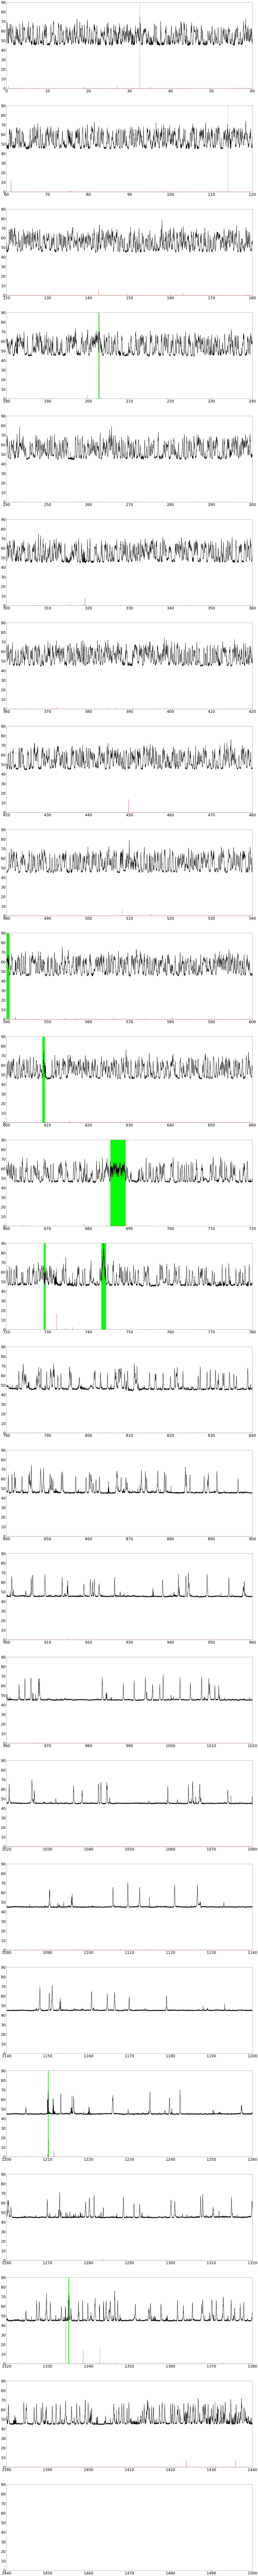

In [29]:
validate.figure(test_v, anorm)